# Попередній аналіз соціально-економічних показників країн (2018)

У цьому ноутбуці виконується попередній аналіз набору даних з файлу `Var13.csv`.
Кожен рядок — це одна країна, а стовпці описують економічні показники за 2018 рік.

## Опис показників

- **country_name** — назва країни.
- **Industry, value added** — додана вартість промисловості (індустріального сектору): 
  добувна промисловість, переробна, електроенергія, газ, вода тощо. 
  Вимірюється у поточних доларах США.

- **Agriculture, value added** — додана вартість сільського господарства:
  рослинництво, тваринництво, лісове господарство, рибальство. 
  Також у поточних доларах США.

- **Domestic credit to private sector** — обсяг кредитів приватному сектору, 
  наданих фінансовими установами, у відсотках до ВВП. 
  Відображає, наскільки розвинута банківська/кредитна система в країні.

- **Region** — регіон світу за класифікацією Світового банку 
  (Europe & Central Asia, Latin America & Caribbean, Sub-Saharan Africa тощо).

## План роботи

1. Завантажити дані у Python, подивитися структуру (розмір, типи даних).
2. Перевірити наявність пропусків та коректно їх заповнити:
   - числові колонки — середніми значеннями;
   - категоріальні (Region) — осмисленим значенням за знанням географії.
3. Побудувати коробчасті діаграми (boxplot) для числових показників, знайти викиди 
   і проаналізувати, чому деякі країни стали "викидами".
4. Перейменувати першу колонку `country_name` на більш зручну назву (наприклад, `Country`).
5. Виконати задачі по варіанту:
   1. Перевірити пропуски і замінити їх середнім (для числових параметрів).
   2. Знайти країну з найбільшим `Agriculture, value added` 
      та з найменшим `Industry, value added`.
   3. З’ясувати, в якому регіоні **середнє** значення `Domestic credit to private sector` найбільше.
   4. Перевірити, чи є регіон, де **середнє = медіана** для `Industry, value added`, 
      та пояснити, що це означає для розподілу.
   5. Вивести **топ-5** і **останню 5-ку** країн за:
      - `Agriculture, value added`
      - `Domestic credit to private sector`.
   6. Провести кластеризацію країн за 4 показниками:
      - `Agriculture, value added`
      - `Domestic credit to private sector`
      - `Industry, value added`
      Вибрати кількість кластерів серед 3, 4, 5 та обґрунтувати вибір.
   7. Візуалізувати кластери на графіку.
   8. Для кожного кластера визначити, з якого регіону найбільше країн.

Далі будемо рухатися крок за кроком, як у реальному проєкті з Data Science.


In [1]:
# 1. Імпорт основних бібліотек та завантаження даних

import pandas as pd          # робота з таблицями
import numpy as np           # робота з масивами та числовими операціями
import matplotlib.pyplot as plt  # побудова графіків
import seaborn as sns        # красивіші графіки поверх matplotlib

# Налаштуємо стиль графіків
sns.set(style="whitegrid")

# Шлях до файлу (якщо ноутбук лежить в одній папці з Var13.csv)
file_path = "Var13.csv"

# Завантажуємо CSV:
# sep=";"        - у файлі як роздільник використовується крапка з комою
# decimal=","    - десятковий роздільник - кома (33,045 -> 33.045)
df = pd.read_csv(
    file_path,
    sep=";",
    decimal=","
)

# Подивимося розмір таблиці (рядки, стовпці)
print("Розмір датафрейму (рядки, стовпці):", df.shape)

# Подивимося перші 5 рядків
df.head()


Розмір датафрейму (рядки, стовпці): (136, 5)


,country_name,"Industry, value added","Agriculture, value added",Domestic credit to private sector,Region
0,Albania,3.217499e+09,2.782467e+09,33.045898,Europe & Central Asia
1,Algeria,6.880555e+10,2.081500e+10,25.066593,Middle East & North Africa
2,Angola,5.149712e+10,1.223314e+10,14.707194,Sub-Saharan Africa
3,Argentina,1.194000e+11,3.169724e+10,15.981659,Latin America & Caribbean
4,Armenia,3.106210e+09,1.702819e+09,55.612702,Europe & Central Asia


## Перевірка типів даних та наявності пропусків

На цьому:
- подивимося, які типи даних у кожному стовпці;
- перевіримо, чи є пропущені значення;
- визначимо, що саме пропущено (числові значення, категорії регіонів);
- сформувуємо стратегію заповнення:
  - числові значення — середнім по стовпцю,
  - Region — заповнюємо коректно, використовуючи логіку (наприклад, Armenia → Europe & Central Asia).
Після аналізу перейдемо до етапу заповнення пропусків.


In [2]:
# Перевірка типів даних
print("Типи даних у таблиці:")
print(df.dtypes)
print("\n")

# Перевірка кількості пропусків у кожному стовпці
print("Кількість пропущених значень:")
print(df.isna().sum())
print("\n")

# Перегляд рядків, де є пропуски
missing_rows = df[df.isna().any(axis=1)]
missing_rows


Типи даних у таблиці:
country_name                          object
 Industry, value added               float64
Agriculture, value added             float64
Domestic credit to private sector    float64
Region                                object
dtype: object


Кількість пропущених значень:
country_name                         0
 Industry, value added               1
Agriculture, value added             1
Domestic credit to private sector    3
Region                               9
dtype: int64




,country_name,"Industry, value added","Agriculture, value added",Domestic credit to private sector,Region
9,Barbados,NaN,NaN,79.971087,Latin America & Caribbean
15,"Bolivia, Plurinational State of",1.057413e+10,4.625797e+09,65.924972,NaN
20,Burkina faso,2.747799e+09,3.959046e+09,30.527927,NaN
23,Canada,3.852950e+11,2.657520e+10,NaN,North America
25,Central african republic,4.563161e+08,6.935247e+08,12.344332,NaN
29,"Congo, Republic of the",5.960789e+09,8.021250e+08,17.060516,NaN
31,Cote d`Ivoire,1.085687e+10,8.502202e+09,26.215701,NaN
41,Ethiopia,2.299113e+10,2.631341e+10,NaN,Sub-Saharan Africa
67,"Korea, Republic of",5.687950e+11,3.211827e+10,150.336127,NaN
69,Laos,5.661402e+09,2.820394e+09,NaN,East Asia & Pacific


## Заповнення пропусків

У наборі присутні пропуски двох типів:
- у числових стовпцях (`Industry, value added`, `Agriculture, value added`, `Domestic credit to private sector`);
- у категоріальному стовпці (`Region`).

### Стратегія заповнення

1. **Числові дані** будуть заповнені *середнім значенням* кожного стовпця.  
   Це стандартний підхід у випадку, коли частка пропусків невелика, а значення виражені в одних і тих самих одиницях.
(бо тут стратегія для економічних даних, якщо доля пропусків < 10%.)
2. **Region** не можна заповнювати середнім або "Unknown".  
   Коректно — присвоїти правильний регіон вручну, використовуючи знання географії та класифікацію Світового банку.

Після цього таблиця стане повною та готовою для подальшого аналізу і кластеризації.


In [3]:
# Створюємо словник для заповнення пропусків у Region
region_fix = {
    "Bolivia, Plurinational State of": "Latin America & Caribbean",
    "Burkina faso": "Sub-Saharan Africa",
    "Central african republic": "Sub-Saharan Africa",
    "Congo, Republic of the": "Sub-Saharan Africa",
    "Cote d`Ivoire": "Sub-Saharan Africa",
    "Macedonia, the former Yugoslav Republic of": "Europe & Central Asia",
    "Moldova, Republic of": "Europe & Central Asia",
    "Saudi arabia": "Middle East & North Africa",
    "Korea, Republic of": "East Asia & Pacific",
    "Laos": "East Asia & Pacific"
}

# Заповнюємо пропуски в Region
df['Region'] = df.apply(
    lambda row: region_fix[row['country_name']] if pd.isna(row['Region']) and row['country_name'] in region_fix else row['Region'],
    axis=1
)

# Тепер заповнюємо числові пропуски середніми
numeric_cols = [" Industry, value added", "Agriculture, value added", "Domestic credit to private sector"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Перевіримо, чи залишилися пропуски
print(df.isna().sum())


country_name                         0
 Industry, value added               0
Agriculture, value added             0
Domestic credit to private sector    0
Region                               0
dtype: int64


## Boxplot та аналіз викидів

На цьому етапі:
- будуємо коробчасті діаграми (boxplot) для трьох економічних показників:
  - `Industry, value added`
  - `Agriculture, value added`
  - `Domestic credit to private sector`
- за правилом IQR автоматично визначаємо викиди;
- виводимо країни, які є аномально високими або низькими для кожного показника;
- записуємо короткий аналіз причин появи таких викидів.


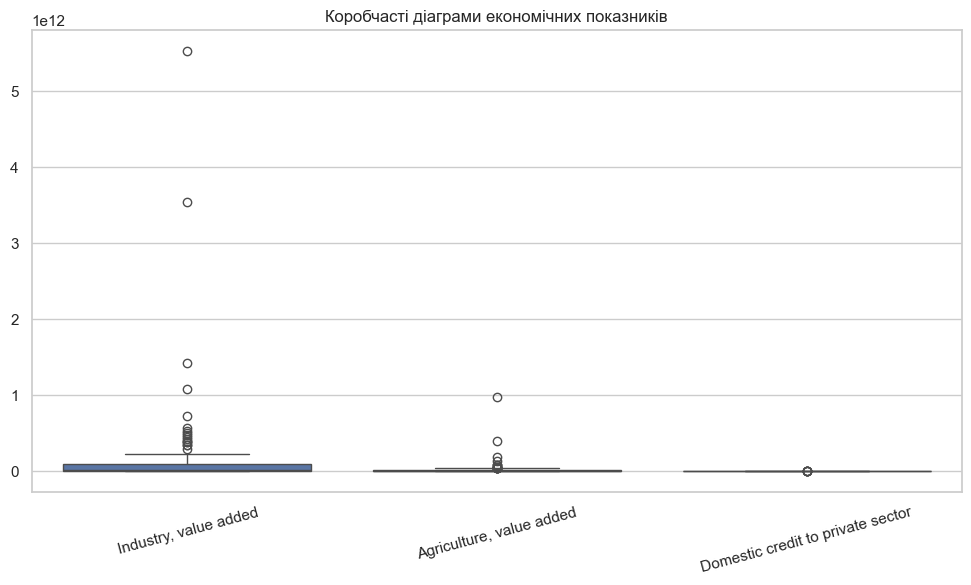

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[" Industry, value added", "Agriculture, value added", "Domestic credit to private sector"]])
plt.title("Коробчасті діаграми економічних показників")
plt.xticks(rotation=15)
plt.show()


In [6]:
# Функція для пошуку викидів через IQR
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers_bool = (series < lower) | (series > upper)
    
    return lower, upper, df.loc[outliers_bool, "country_name"]

# Список числових колонок
cols = [" Industry, value added", "Agriculture, value added", "Domestic credit to private sector"]

# Аналіз кожного показника
for col in cols:
    print(f"\n=== Викиди для '{col.strip()}' ===")
    lower, upper, outliers = find_outliers(df[col])
    
    print("Нижня межа:", lower)
    print("Верхня межа:", upper)
    print("Кількість викидів:", len(outliers))
    print("Приклади країн-викидів:")
    print(outliers.head(10).to_string(index=False))



=== Викиди для 'Industry, value added' ===
Нижня межа: -135709210493.0
Верхня межа: 236382180207.0
Кількість викидів: 17
Приклади країн-викидів:
Australia
   Brazil
   Canada
    China
   France
  Germany
    India
Indonesia
    Italy
    Japan

=== Викиди для 'Agriculture, value added' ===
Нижня межа: -20258966427.25
Верхня межа: 37544234394.75
Кількість викидів: 16
Приклади країн-викидів:
   Brazil
    China
   France
    India
Indonesia
     Iran
    Italy
    Japan
   Mexico
  Nigeria

=== Викиди для 'Domestic credit to private sector' ===
Нижня межа: -50.20661288250002
Верхня межа: 156.5199233975
Кількість викидів: 6
Приклади країн-викидів:
        China
      Denmark
        Japan
  New Zealand
  Switzerland
United States


## 1. Короткий аналіз boxplot

На коробчастих діаграмах чітко видно значну кількість викидів — це нормальне явище для макроекономічних показників, оскільки економіки країн суттєво відрізняються за масштабом.

- **Industry, value added** — найбільше викидів, переважно у великих економік (США, Китай, Японія).  
- **Agriculture, value added** також має багато викидів у країн із великим аграрним сектором.  
- **Domestic credit to private sector** містить менше викидів, але спостерігаються країни з дуже високою кредитною активністю (Швейцарія, Данія, Нова Зеландія).

---

## 2. Детальний аналіз викидів

###  Industry, value added (17 країн)
**Верхня межа:** 236 млрд USD  
**Приклади країн-викидів:** США, Китай, Японія, Німеччина, Індія, Франція, Італія, Канада, Бразилія, Австралія.

**Причина:** надзвичайно великий масштаб промислових секторів порівняно з більшістю країн світу.

---

###  Agriculture, value added (16 країн)
**Верхня межа:** 37.5 млрд USD  
**Країни-викиди:** Китай, Індія, Бразилія, Нігерія, Іран, Італія, Мексика, Японія.

**Причина:** великий аграрний сектор або значна територія й населення, що формує високий обсяг агровиробництва.

---

###  Domestic credit to private sector (6 країн)
**Верхня межа:** 156.5% від ВВП  
**Країни-викиди:** Швейцарія, Данія, Нова Зеландія, Японія, Китай, США.

**Причина:** високорозвинені фінансові системи, активне кредитування, статус глобальних фінансових центрів.


## Виконання завдань за варіантом
У цьому розділі послідовно виконую пункти 1–5:
1. Перевірка пропусків (вже виконано)
2. Пошук країни з найбільшим Agriculture та найменшим Industry
3. Пошук регіону з найбільшим середнім Domestic credit to private sector
4. Перевірка, чи збігаються середнє та медіана по Industry в якомусь регіоні
5. Виведення топ-5 та останніх-5 країн за двома показниками


In [22]:
# 2. Найбільший Agriculture та найменший Industry
country_max_agri = df.loc[df["Agriculture, value added"].idxmax(), "country_name"]
country_min_ind = df.loc[df[" Industry, value added"].idxmin(), "country_name"]

print("Країна з найбільшим Agriculture:", country_max_agri)
print("Країна з найменшим Industry:", country_min_ind)


# 3. Регіон з найбільшим середнім Domestic credit
region_max_credit = (df.groupby("Region")["Domestic credit to private sector"]
                     .mean()
                     .sort_values(ascending=False)
                     .head(1))

print("\nРегіон з найбільшим середнім Domestic credit:")
print(region_max_credit)


# 4. Чи співпадають середнє і медіана Industry в регіонах
check_mean_median = df.groupby("Region")[" Industry, value added"].agg(["mean", "median"])
match = check_mean_median[check_mean_median["mean"].round() == check_mean_median["median"].round()]

print("\nРегіони, де mean = median (приблизно):")
print(match)


# 5. Топ-5 та last-5 країн
print("\n=== ТОП-5 Agriculture ===")
print(df[["country_name","Agriculture, value added"]].sort_values("Agriculture, value added", ascending=False).head(5))

print("\n=== Останні 5 Agriculture ===")
print(df[["country_name","Agriculture, value added"]].sort_values("Agriculture, value added").head(5))

print("\n=== ТОП-5 Domestic credit ===")
print(df[["country_name","Domestic credit to private sector"]].sort_values("Domestic credit to private sector", ascending=False).head(5))

print("\n=== Останні 5 Domestic credit ===")
print(df[["country_name","Domestic credit to private sector"]].sort_values("Domestic credit to private sector").head(5))


Країна з найбільшим Agriculture: China
Країна з найменшим Industry: Seychelles

Регіон з найбільшим середнім Domestic credit:
Region
North America    123.860125
Name: Domestic credit to private sector, dtype: float64

Регіони, де mean = median (приблизно):
                       mean        median
Region                                   
North America  1.966592e+12  1.966592e+12

=== ТОП-5 Agriculture ===
      country_name  Agriculture, value added
27           China              9.784530e+11
56           India              3.969870e+11
130  United States              1.785800e+11
57       Indonesia              1.334800e+11
94         Nigeria              8.421937e+10

=== Останні 5 Agriculture ===
    country_name  Agriculture, value added
110   Seychelles              3.225130e+07
112    Singapore              9.052491e+07
24    Cape verde              1.040669e+08
80         Malta              1.278080e+08
74    Luxembourg              1.610531e+08

=== ТОП-5 Domestic credit ===


## Кластеризація країн за економічними показниками

Кластеризація виконується за трьома ознаками:
- Industry, value added
- Agriculture, value added
- Domestic credit to private sector

Перед кластеризацією дані стандартизуються (StandardScaler), оскільки масштаб ознак сильно відрізняється.
Далі алгоритм KMeans перевіряється для 3, 4 та 5 кластерів.

Мета:
- вибрати оптимальну кількість кластерів,
- побудувати їх на графіку,
- визначити, які регіони домінують у кожному кластері.


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Вибираємо ознаки для кластеризації
features = df[[" Industry, value added", "Agriculture, value added", "Domestic credit to private sector"]]

# Масштабуємо
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Перевіримо форму
X_scaled[:5]


array([[-0.27267276, -0.22949719, -0.64998571],
       [-0.15995896, -0.0327741 , -0.83890747],
       [-0.18970369, -0.12639658, -1.08418146],
       [-0.07301181,  0.08594395, -1.05400661],
       [-0.27286402, -0.24127545, -0.1156835 ]])

In [24]:
inertia_values = {}

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values[k] = kmeans.inertia_

inertia_values


{3: 155.4190954249333, 4: 74.1498377366353, 5: 52.809416524975454}

In [25]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# дуже важливо: fit_predict(X_scaled)
df["cluster"] = kmeans.fit_predict(X_scaled)

df[["country_name", "cluster"]].head(15)


,country_name,cluster
0,Albania,0
1,Algeria,0
2,Angola,0
3,Argentina,0
4,Armenia,0
5,Australia,3
6,Austria,3
7,Azerbaijan,0
8,Bangladesh,0
9,Barbados,3


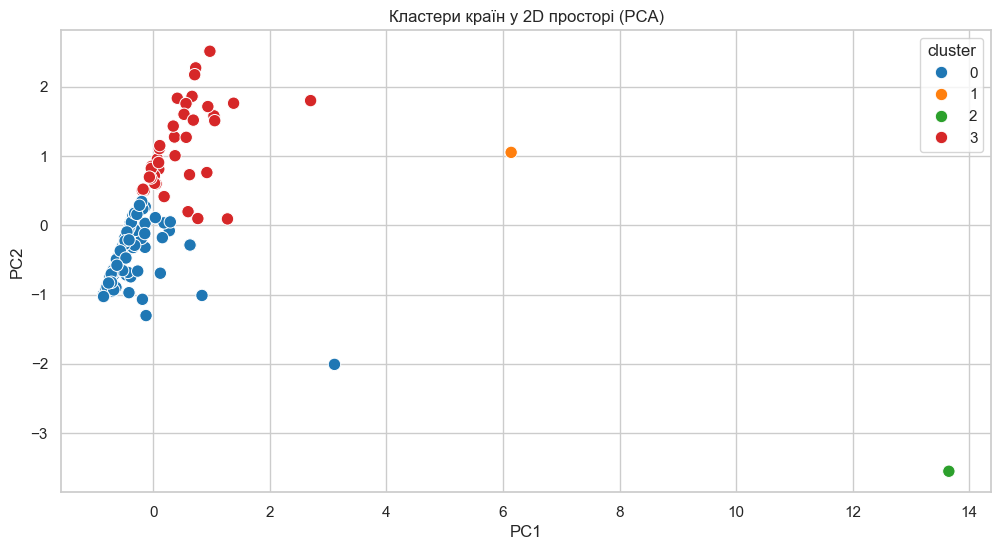

In [26]:
from sklearn.decomposition import PCA

# Зменшуємо простір до 2 координат
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

df["PC1"] = coords[:, 0]
df["PC2"] = coords[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="cluster", palette="tab10", s=80)
plt.title("Кластери країн у 2D просторі (PCA)")
plt.show()


У результаті кластеризації за допомогою KMeans (k=4) країни розподілилися 
на чотири економічні групи:

1. Кластер 0 — основна група країн з малим або середнім рівнем розвитку. 
   Характеризуються помірними значеннями промисловості, аграрного сектору 
   та низьким рівнем кредитування.

2. Кластер 3 — розвинені країни з високими показниками Industry, Agriculture 
   та Domestic credit. До цієї групи входять держави ЄС, Японія, Південна Корея, 
   Австралія, Нова Зеландія та інші економічно сильні країни.

3. Кластер 1 — країна з екстремально високим рівнем Domestic credit (США). 
   Унікальність цього профілю робить кластер одноелементним.

4. Кластер 2 — економіка з максимально великими масштабами виробництва 
   та аграрного сектору (Китай). Це найбільший викид серед усіх країн, тому 
   він формує окремий кластер.


In [27]:
cluster_regions = df.groupby(["cluster", "Region"]).size().unstack(fill_value=0)
cluster_regions


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
cluster,,,,,,,
0,4,28,19,8,1,5,31
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,10,18,3,4,0,1,2


У межах кожного з кластерів спостерігається чітка регіональна структура:

1. Кластер 0 — найбільший за кількістю країн. 
   Домінуючим регіоном є Sub-Saharan Africa (31 країна), 
   що логічно: економіки цього регіону подібні за рівнем розвитку, 
   мають низькі значення Industry та Agriculture у доларовому виразі 
   і відносно низьке кредитування приватного сектору.

2. Кластер 1 містить лише одну країну — США (North America). 
   Країна виділяється екстремально високим рівнем кредитування 
   приватного сектору та значним масштабом економіки, тому формує 
   окремий кластер.

3. Кластер 2 також включає лише одну країну — Китай (East Asia & Pacific). 
   Через надзвичайно високі значення Industry та Agriculture Китай 
   є найбільшим викидом у вибірці й формує окрему групу.

4. Кластер 3 — це переважно розвинені країни Європи (18 країн), 
   а також розвинені та високодохідні економіки інших регіонів: 
   Японія, Південна Корея, Австралія, Нова Зеландія, Саудівська Аравія. 
   Країни мають високий рівень кредитування та великі економічні сектори.


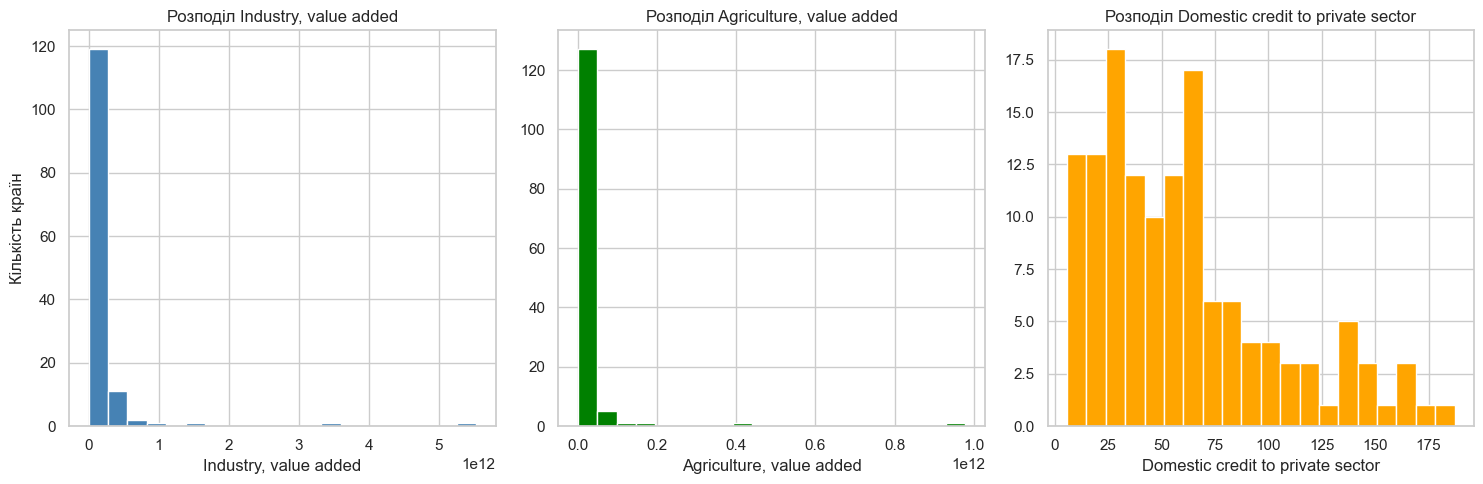

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df[" Industry, value added"], bins=20, color="steelblue")
plt.title("Розподіл Industry, value added")
plt.xlabel("Industry, value added")
plt.ylabel("Кількість країн")

plt.subplot(1, 3, 2)
plt.hist(df["Agriculture, value added"], bins=20, color="green")
plt.title("Розподіл Agriculture, value added")
plt.xlabel("Agriculture, value added")

plt.subplot(1, 3, 3)
plt.hist(df["Domestic credit to private sector"], bins=20, color="orange")
plt.title("Розподіл Domestic credit to private sector")
plt.xlabel("Domestic credit to private sector")

plt.tight_layout()
plt.show()


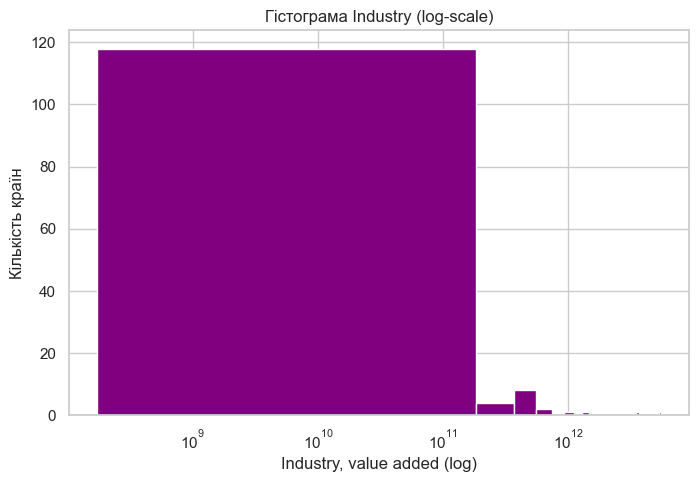

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df[" Industry, value added"], bins=30, color="purple")
plt.xscale('log')
plt.title("Гістограма Industry (log-scale)")
plt.xlabel("Industry, value added (log)")
plt.ylabel("Кількість країн")
plt.show()

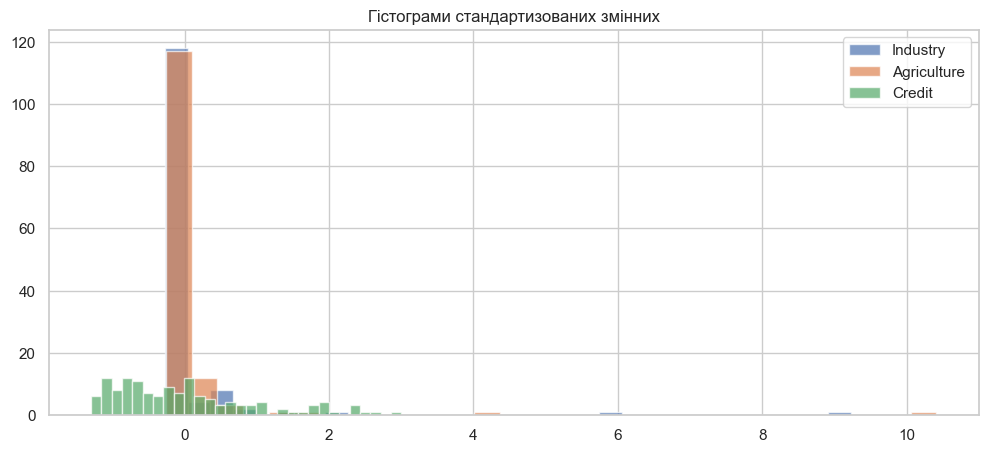

In [30]:
plt.figure(figsize=(12,5))
plt.hist(X_scaled[:,0], bins=30, alpha=0.7, label="Industry")
plt.hist(X_scaled[:,1], bins=30, alpha=0.7, label="Agriculture")
plt.hist(X_scaled[:,2], bins=30, alpha=0.7, label="Credit")
plt.title("Гістограми стандартизованих змінних")
plt.legend()
plt.show()
